In [50]:
import pandas as pd

# Load the dataset
file_path = 'heart_data_smote_modified.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_info, df_head, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584844 entries, 0 to 584843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               584844 non-null  float64
 1   Smoking           584844 non-null  int64  
 2   AlcoholDrinking   584844 non-null  int64  
 3   Stroke            584844 non-null  int64  
 4   PhysicalHealth    584844 non-null  float64
 5   MentalHealth      584844 non-null  float64
 6   DiffWalking       584844 non-null  int64  
 7   Sex               584844 non-null  int64  
 8   AgeCategory       584844 non-null  int64  
 9   Race              584844 non-null  int64  
 10  Diabetic          584844 non-null  int64  
 11  PhysicalActivity  584844 non-null  int64  
 12  GenHealth         584844 non-null  int64  
 13  SleepTime         584844 non-null  float64
 14  HeartDisease      584844 non-null  int64  
 15  HasHealthIssues   584844 non-null  int64  
dtypes: float64(4), int64

(None,
      BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
 0  16.60        1                0       0             3.0          30.0   
 1  20.34        0                0       1             0.0           0.0   
 2  26.58        1                0       0            20.0          30.0   
 3  24.21        0                0       0             0.0           0.0   
 4  23.71        0                0       0            28.0           0.0   
 
    DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
 0            0    0            7     5         2                 1          4   
 1            0    0           12     5         0                 1          4   
 2            0    1            9     5         2                 1          1   
 3            0    0           11     5         0                 0          2   
 4            1    0            4     5         0                 1          4   
 
    SleepTime  HeartDisease  HasHea

In [51]:
import pandas as pd

white_df = df[df['Race'] == 5]
non_white_df = df[df['Race'] != 5]

white_sample = white_df.sample(frac=0.9, random_state=42)

df = pd.concat([white_sample, non_white_df])

df['Race'] = (df['Race'] == 5).astype(int)

print(df['Race'].value_counts(normalize=True))
df.to_csv('heart_data_smote_modified.csv', index=False)


Race
1    0.763198
0    0.236802
Name: proportion, dtype: float64


In [58]:
df['Diabetic'] = df['Diabetic'].replace({
    'Yes': 1,
    'No': 0,
    'Borderline': 1,
    'During pregnancy': 1
})

df['Diabetic'] = df['Diabetic'].astype(int)





print(df['Diabetic'].value_counts(normalize=True))

df.to_csv('heart_data_smote_modified.csv', index=False)

Diabetic
0    0.760711
2    0.195702
1    0.039048
3    0.004539
Name: proportion, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_26364\3526280735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_26364\3526280735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_26364\3526280735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_26364\3526280735.py:12: FutureWarning: 

Passing `pal

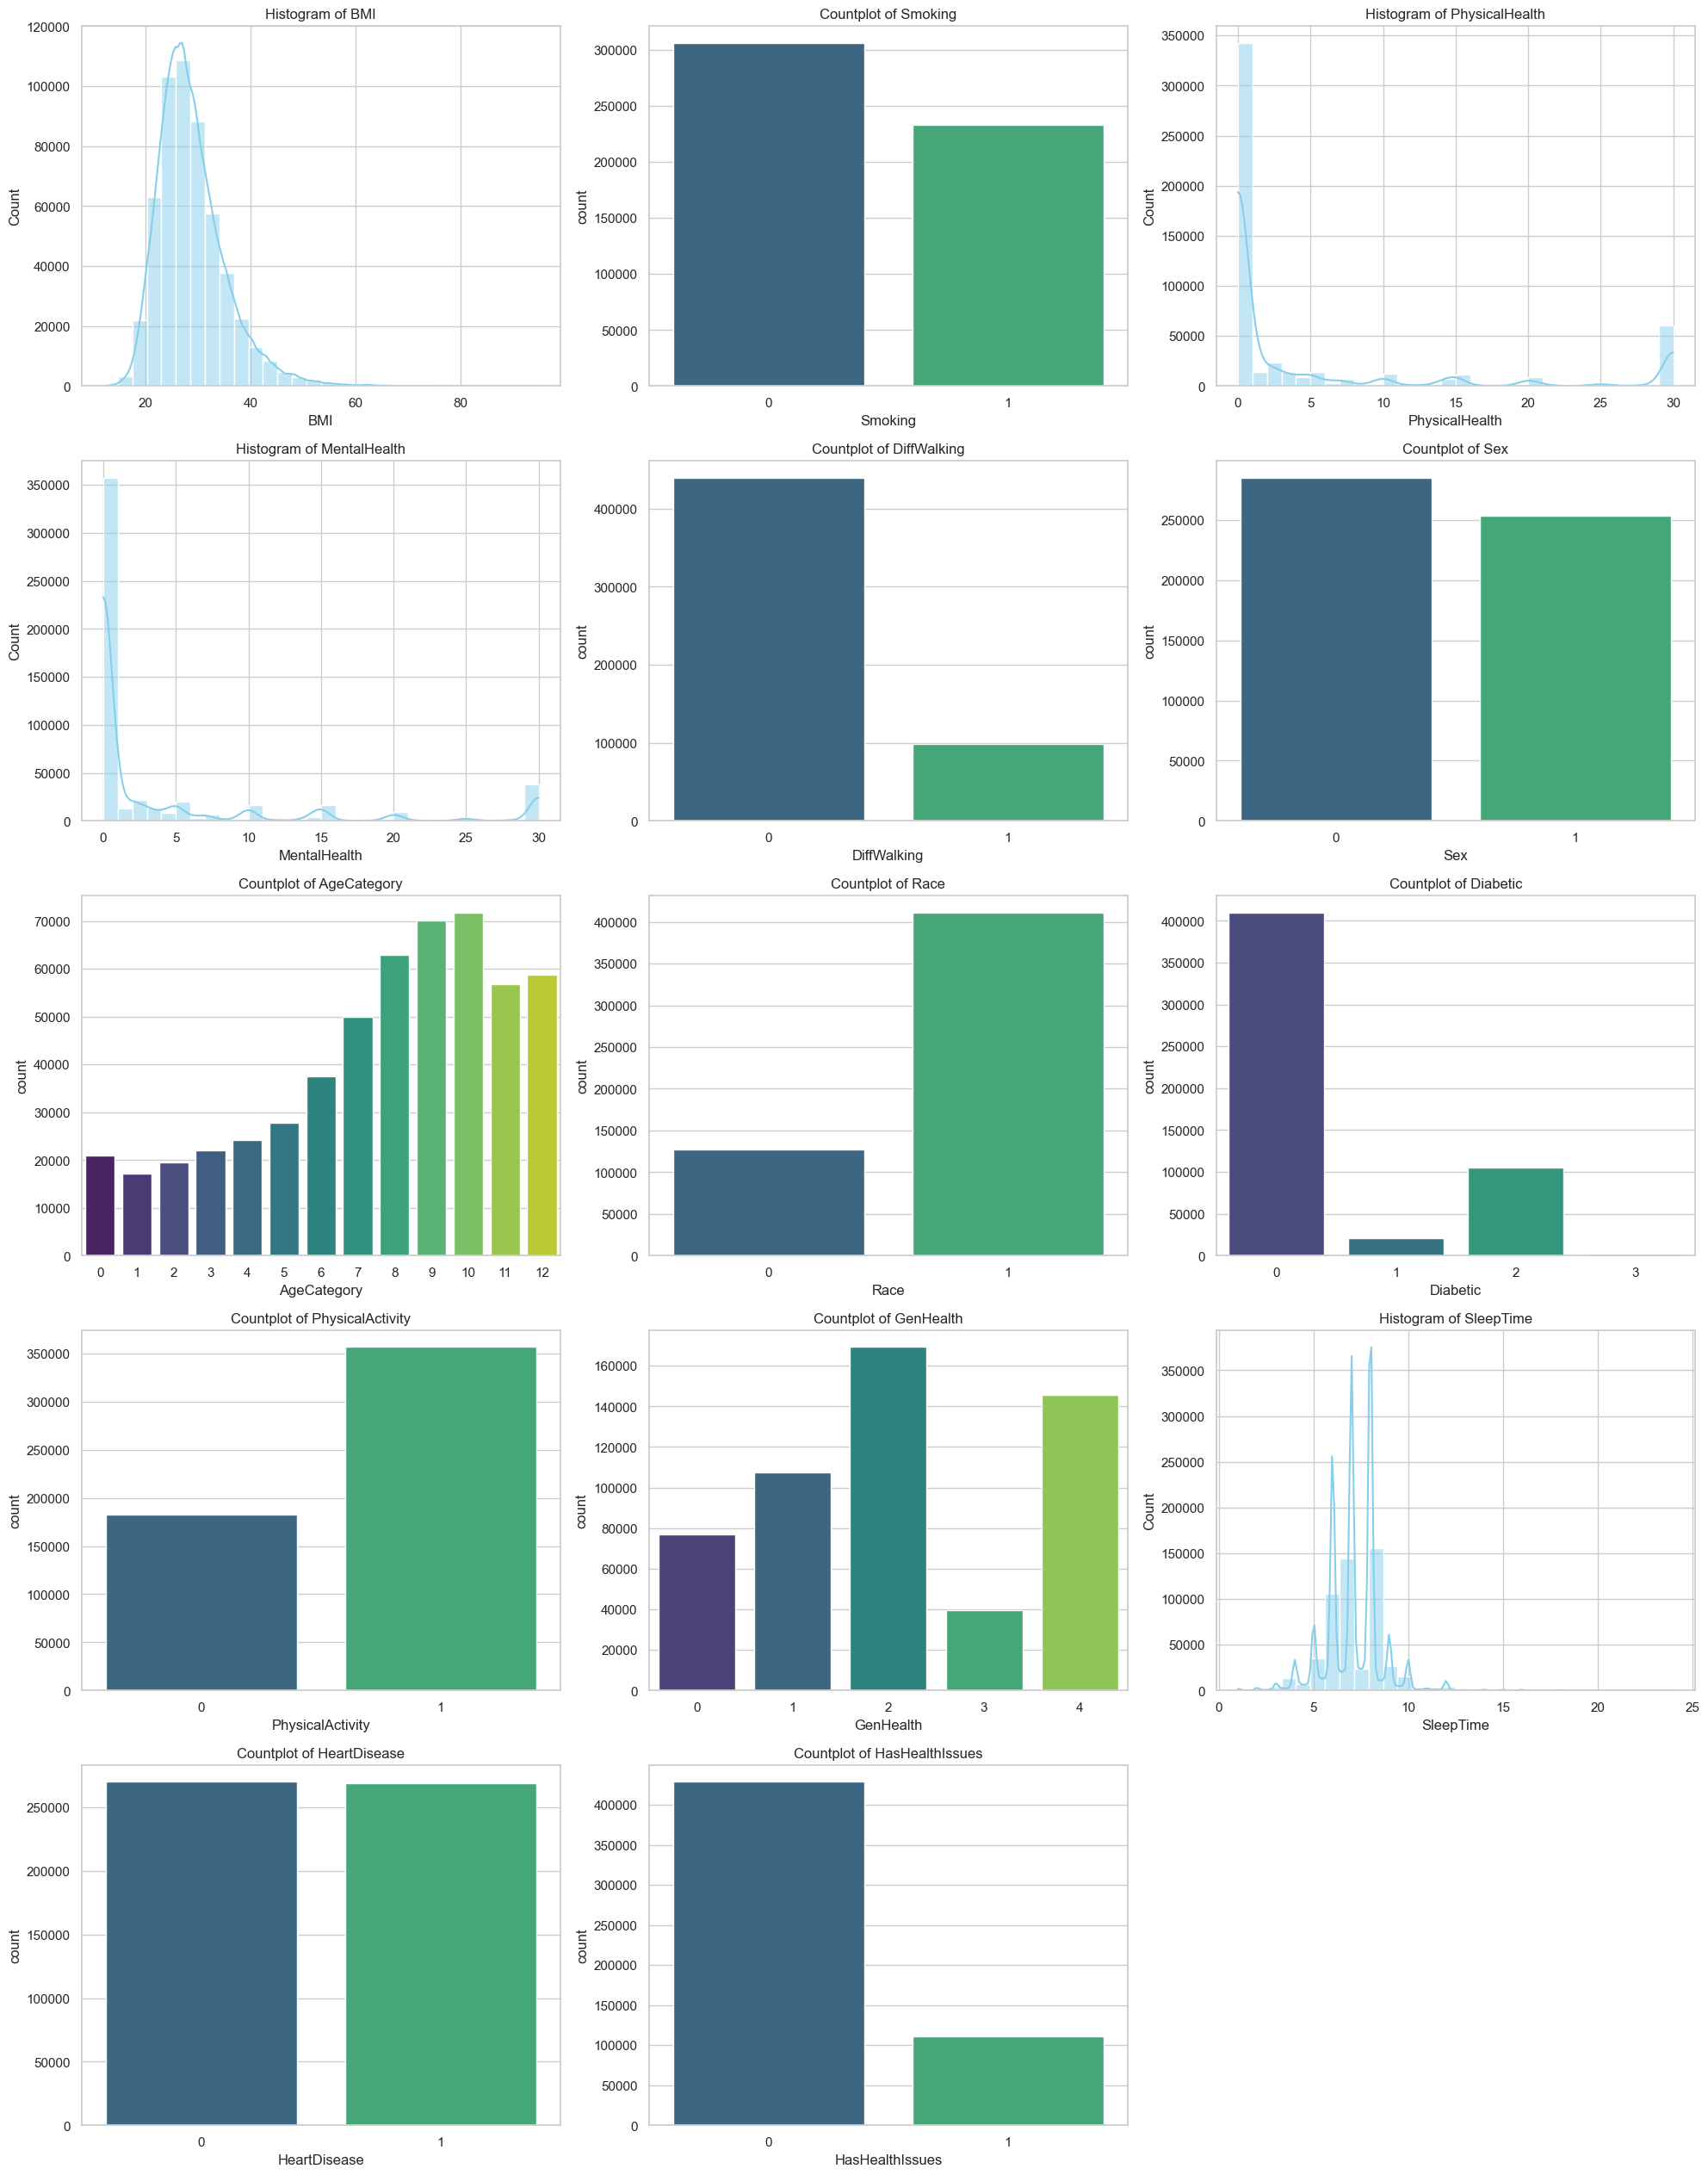

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 30))

# Loop through all columns and plot histograms
for i, column in enumerate(df.columns):
    plt.subplot(6, 3, i + 1)
    if df[column].nunique() <= 20:
        sns.countplot(data=df, x=column, palette="viridis")
        plt.title(f"Countplot of {column}")
    else:
        sns.histplot(df[column], kde=True, bins=30, color='skyblue')
        plt.title(f"Histogram of {column}")
    plt.tight_layout()

plt.show()


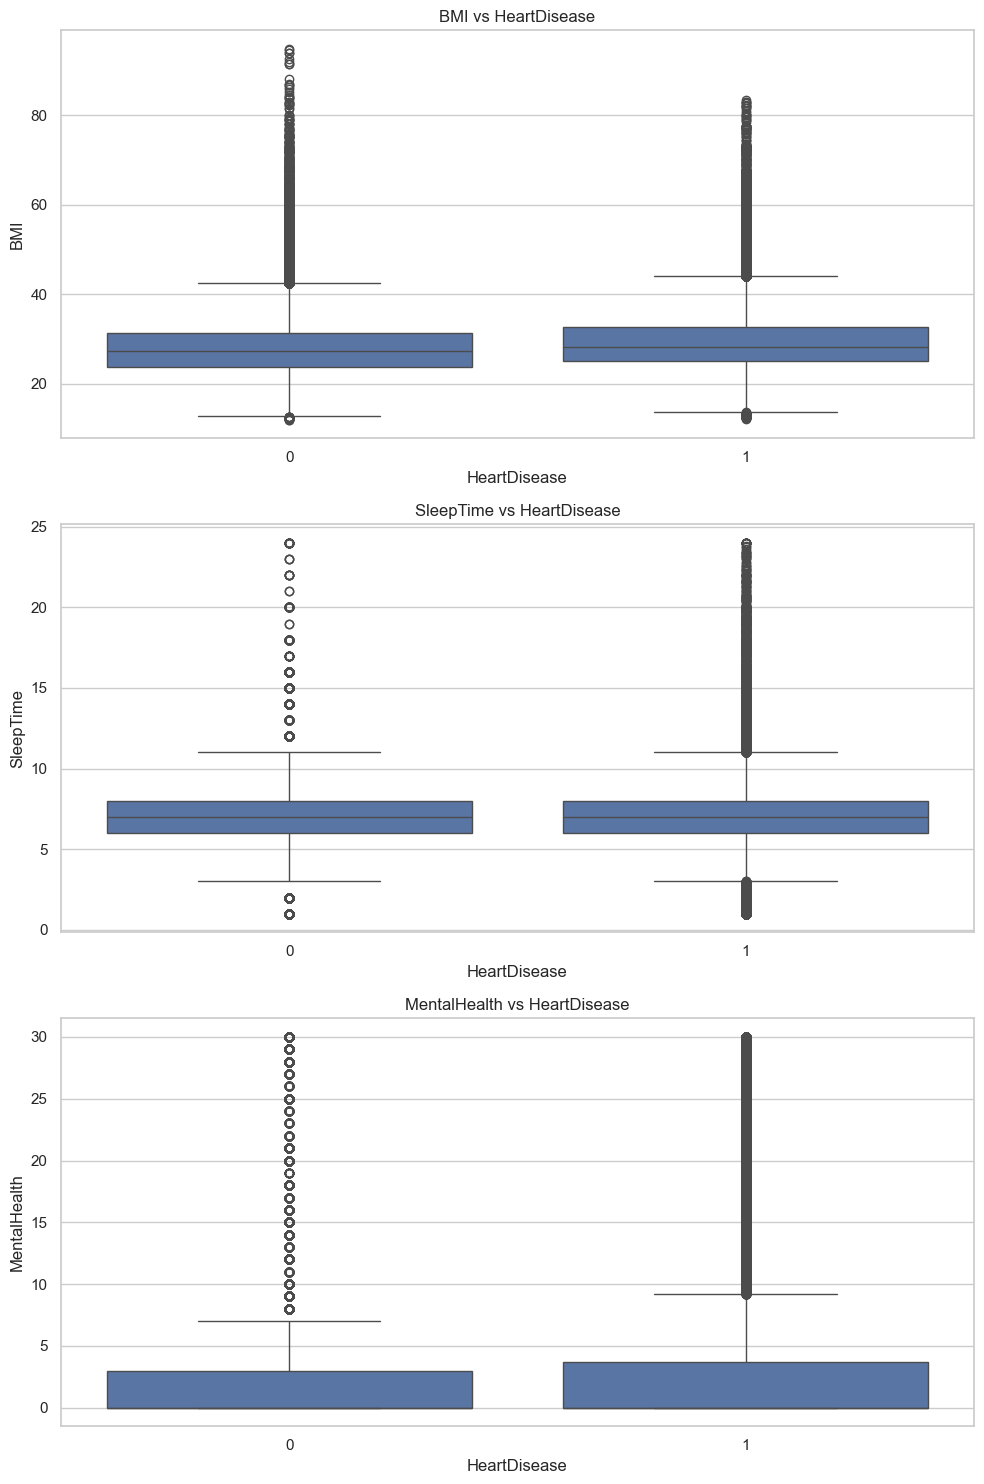

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ['BMI', 'SleepTime', 'MentalHealth']

fig, axs = plt.subplots(len(selected_cols), 1, figsize=(10, 15))
for i, col in enumerate(selected_cols):
    sns.boxplot(x='HeartDisease', y=col, data=df, ax=axs[i])
    axs[i].set_title(f'{col} vs HeartDisease')

plt.tight_layout()
plt.show()



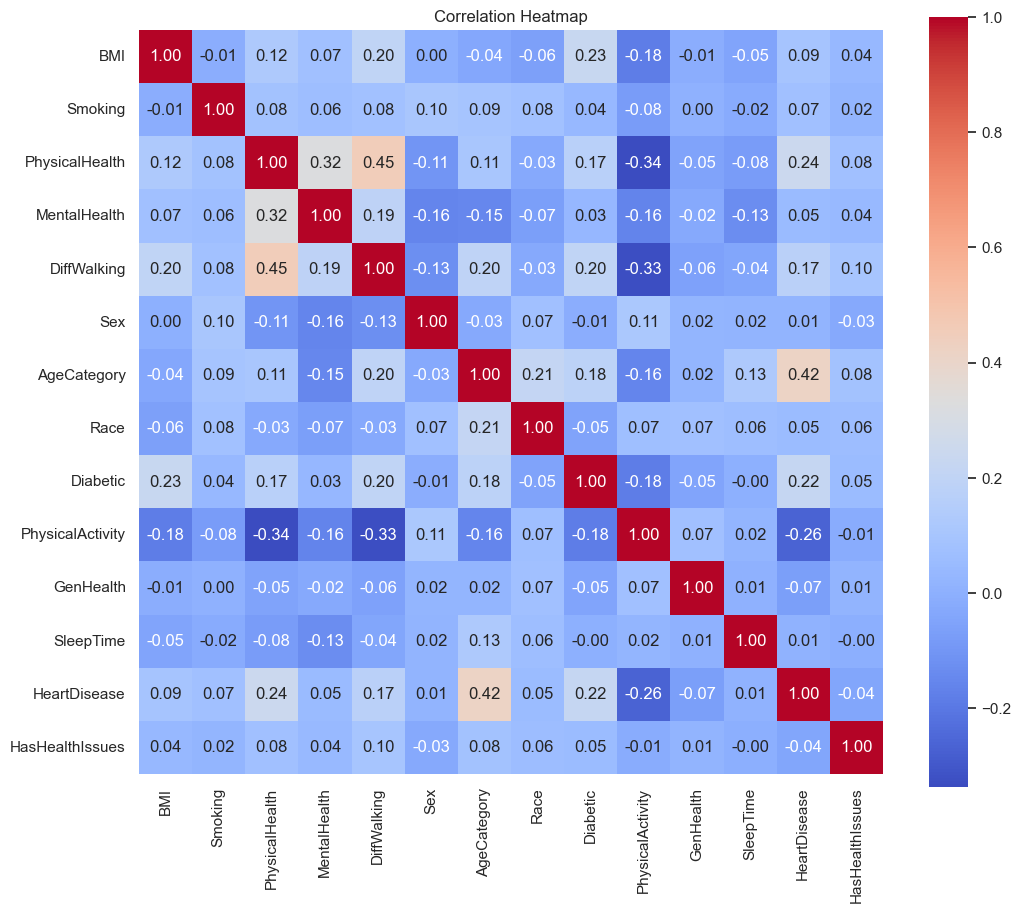

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [66]:
df.groupby("Sex")["HeartDisease"].mean()


Sex
0    0.493003
1    0.505892
Name: HeartDisease, dtype: float64

<Axes: xlabel='AgeCategory', ylabel='HeartDisease'>

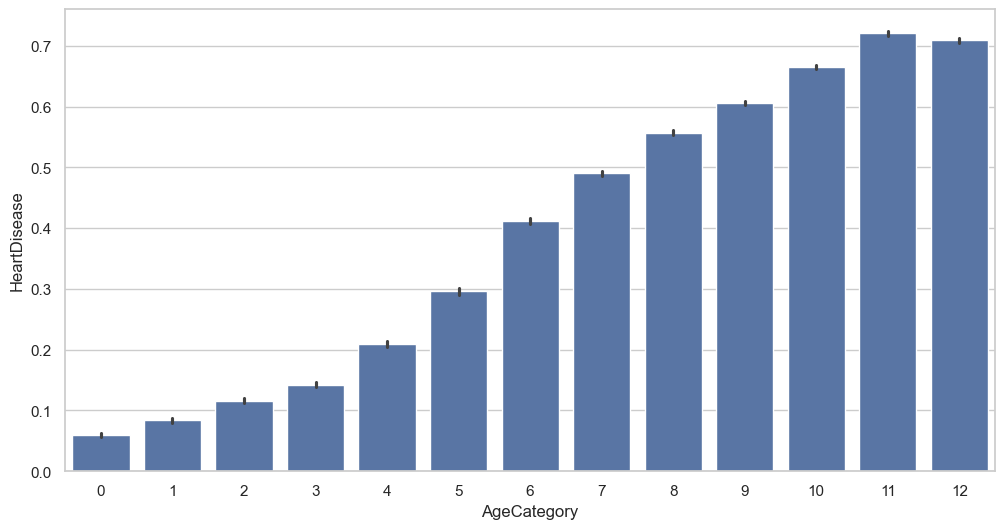

In [67]:
sns.barplot(x="AgeCategory", y="HeartDisease", data=df)


<Axes: xlabel='HeartDisease', ylabel='count'>

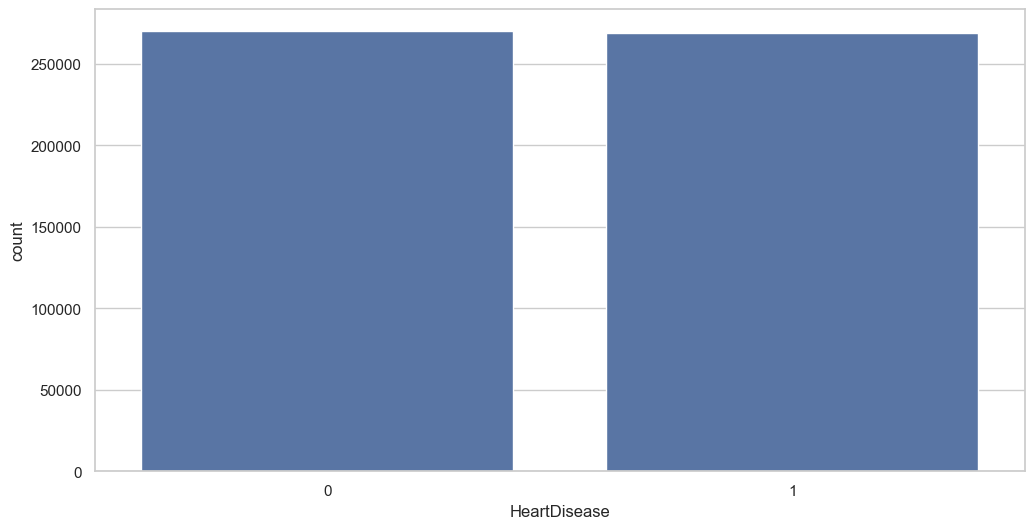

In [69]:
sns.countplot(x='HeartDisease', data=df)


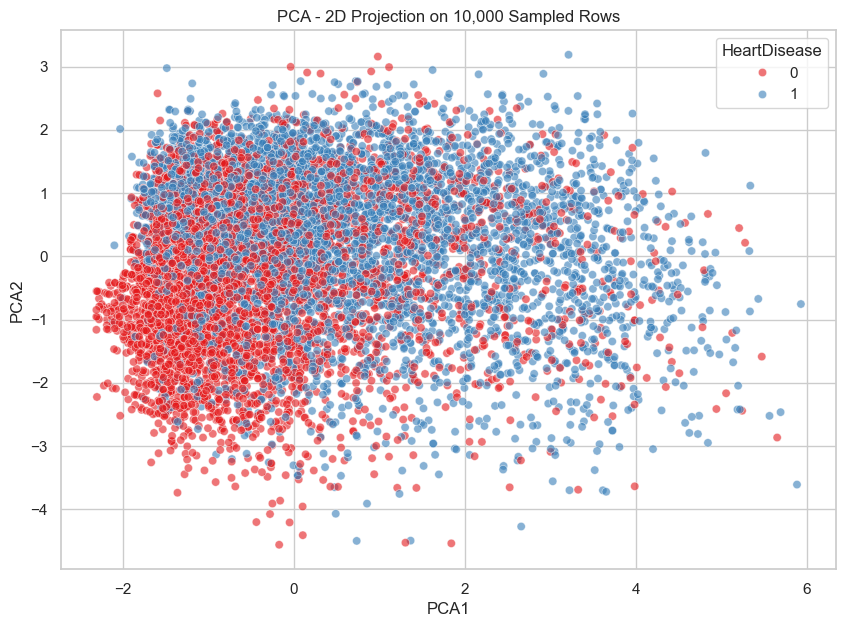

In [73]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_sample = resample(df, n_samples=10000, random_state=42).reset_index(drop=True)

features_sample = df_sample.select_dtypes(include=['int64', 'float64']).drop(columns=['HeartDisease'])

scaler = StandardScaler()
scaled_sample = scaler.fit_transform(features_sample)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_sample)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['HeartDisease'] = df_sample['HeartDisease']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='HeartDisease', palette='Set1', alpha=0.6)
plt.title('PCA - 2D Projection on 10,000 Sampled Rows')
plt.show()
